In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv


IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("../input/credit-risk-dataset/credit_risk_dataset.csv")

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.shape

(32581, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)

In [10]:
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

In [11]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [12]:
df.duplicated().sum()

165

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]

In [15]:
likely_to_have_outlier = ["person_age","person_income","person_emp_length","cb_person_cred_hist_length"]
for col in likely_to_have_outlier:
    print(find_outliers(df, col).shape)

(1491, 12)
(1478, 12)
(852, 12)
(1139, 12)


<AxesSubplot:>

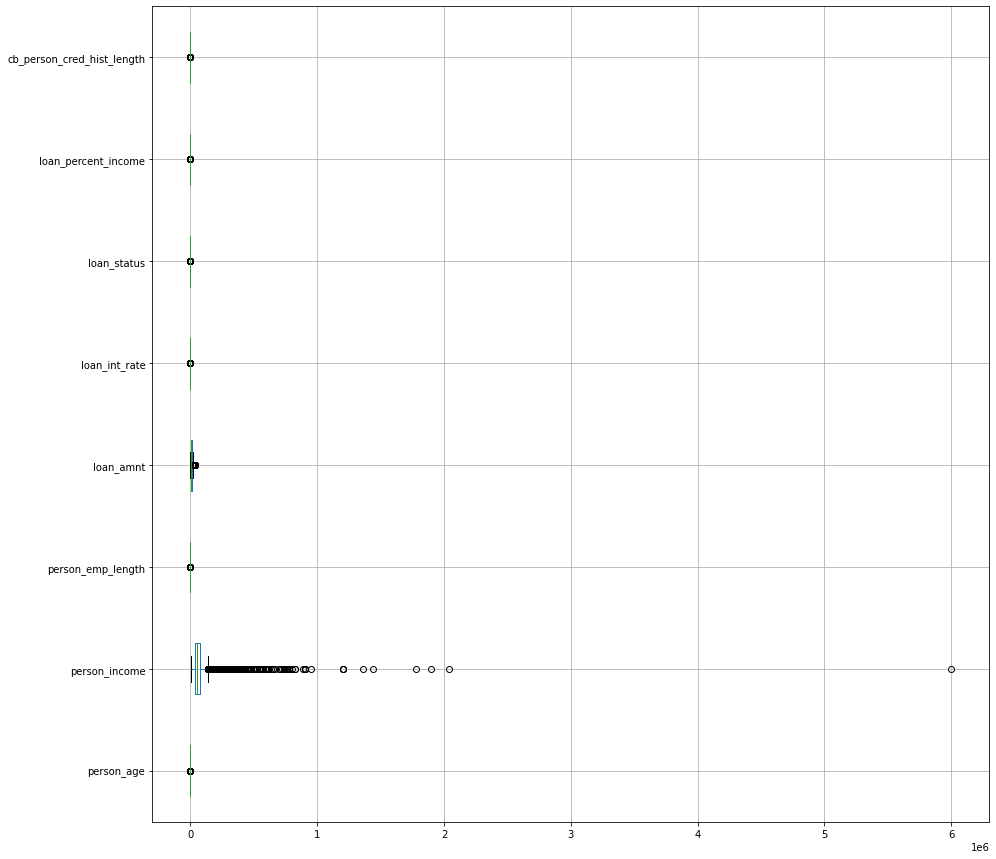

In [16]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
df[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_status','loan_percent_income','cb_person_cred_hist_length']].boxplot(vert=0)

In [17]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    df[col] = np.where(df[col]>upper_range, upper_range, df[col])
    df[col] = np.where(df[col]<lower_range, lower_range, df[col])
    return df

In [18]:
for col in likely_to_have_outlier:
    remove_outliers(df, col)

<AxesSubplot:>

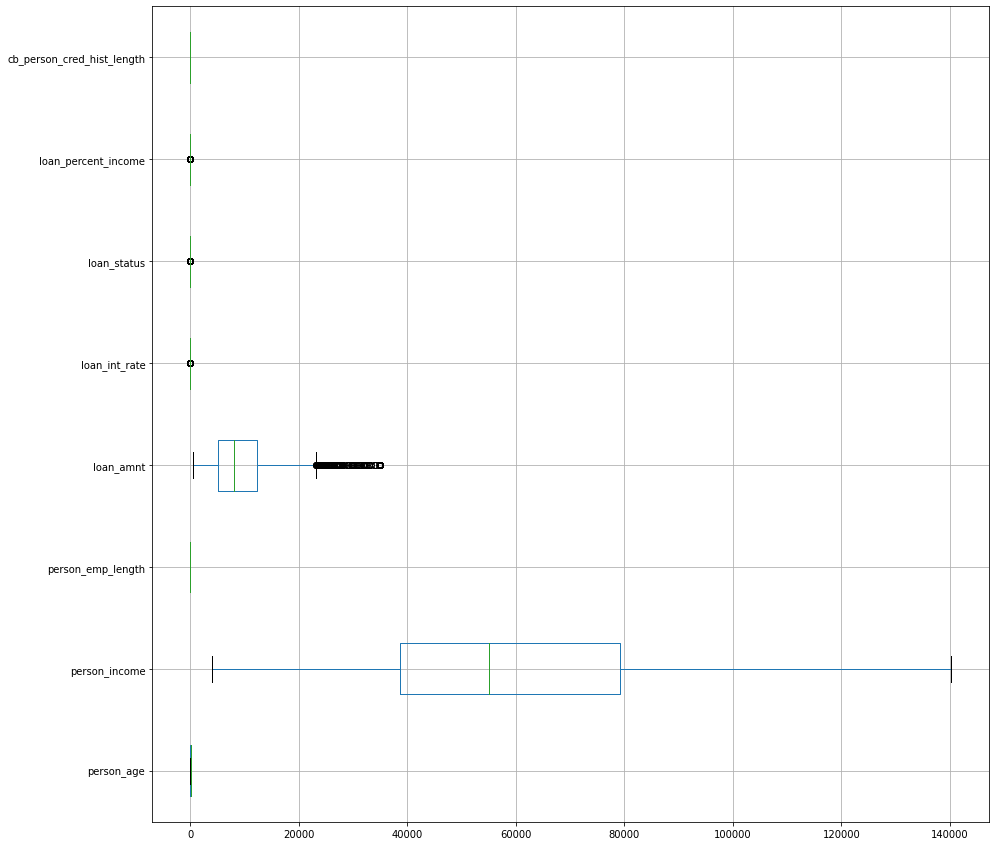

In [19]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
df[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_status','loan_percent_income','cb_person_cred_hist_length']].boxplot(vert=0)

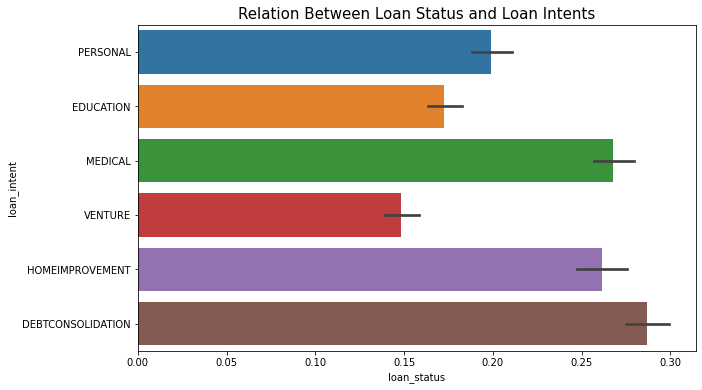

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["loan_status"], y=df["loan_intent"])
plt.title("Relation Between Loan Status and Loan Intents", size=15)
plt.show()

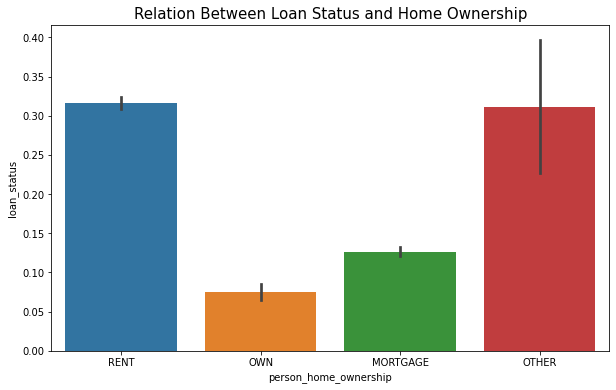

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["person_home_ownership"], y=df["loan_status"])
plt.title("Relation Between Loan Status and Home Ownership", size=15)
plt.show()

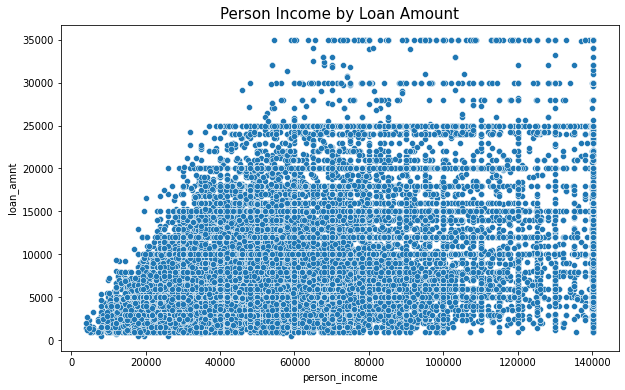

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="person_income", y="loan_amnt", data=df)
plt.title("Person Income by Loan Amount", size=15)
plt.show()

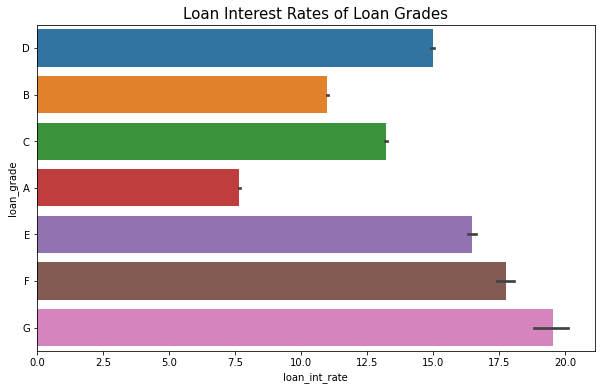

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["loan_int_rate"], y=df["loan_grade"])
plt.title("Loan Interest Rates of Loan Grades", size=15)
plt.show()

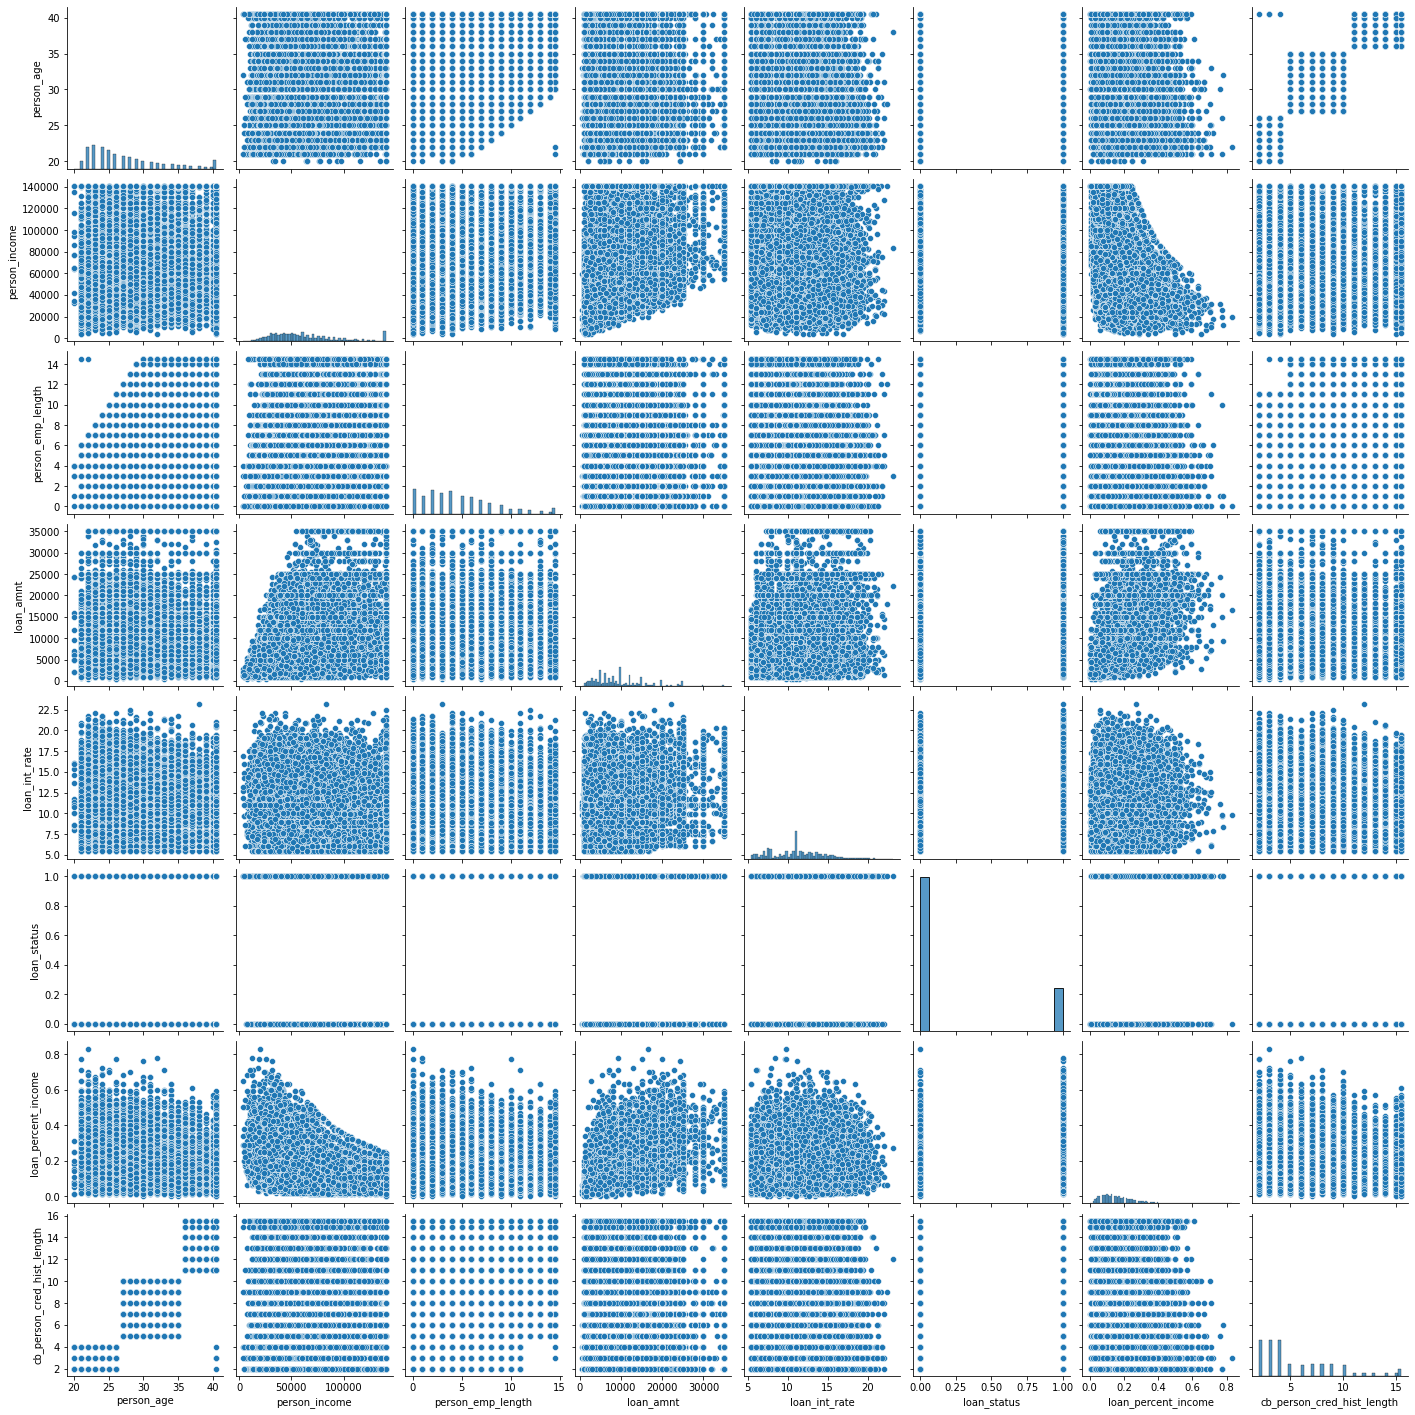

In [24]:
sns.pairplot(df)

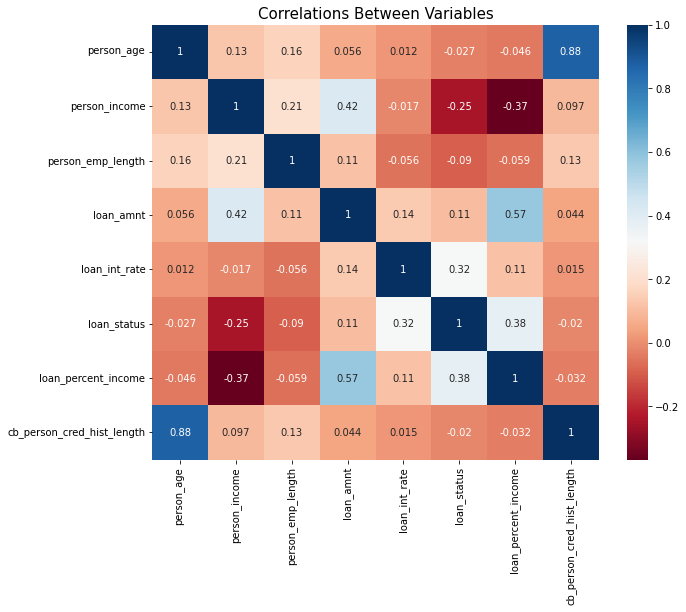

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

**Now, let us check the basic measures of descriptive statistics for the categorical variables**

In [26]:
df['person_home_ownership'].value_counts()

RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: person_home_ownership, dtype: int64

In [27]:
df['loan_intent'].value_counts()

EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: loan_intent, dtype: int64

In [28]:
df['loan_grade'].value_counts()

A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: loan_grade, dtype: int64

In [29]:
df['cb_person_default_on_file'].value_counts()

N    26686
Y     5730
Name: cb_person_default_on_file, dtype: int64

**CONVERTING OBJECT VARIABLES INTO NUMERICAL VARIABLE**

In [30]:
df.person_home_ownership = df.person_home_ownership.str.replace('RENT', '0')
df.person_home_ownership = df.person_home_ownership.str.replace('MORTGAGE', '1')
df.person_home_ownership = df.person_home_ownership.str.replace('OWN', '2')
df.person_home_ownership = df.person_home_ownership.str.replace('OTHER', '3')

df.loan_intent = df.loan_intent.str.replace('EDUCATION', '0')
df.loan_intent = df.loan_intent.str.replace('MEDICAL', '1')
df.loan_intent = df.loan_intent.str.replace('VENTURE', '2')
df.loan_intent = df.loan_intent.str.replace('PERSONAL', '3')
df.loan_intent = df.loan_intent.str.replace('DEBTCONSOLIDATION', '4')
df.loan_intent = df.loan_intent.str.replace('HOMEIMPROVEMENT', '5')

df.loan_grade = df.loan_grade.str.replace('A', '0')
df.loan_grade = df.loan_grade.str.replace('B', '1')
df.loan_grade = df.loan_grade.str.replace('C', '2')
df.loan_grade = df.loan_grade.str.replace('D', '3')
df.loan_grade = df.loan_grade.str.replace('E', '4')
df.loan_grade = df.loan_grade.str.replace('F', '5')
df.loan_grade = df.loan_grade.str.replace('G', '6')

df.cb_person_default_on_file = df.cb_person_default_on_file.str.replace('N', '0')
df.cb_person_default_on_file = df.cb_person_default_on_file.str.replace('Y', '1')

In [31]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,0,14.5,3,3,35000,16.02,1,0.59,1,3.0
1,21.0,9600.0,2,5.0,0,1,1000,11.14,0,0.10,0,2.0
2,25.0,9600.0,1,1.0,1,2,5500,12.87,1,0.57,0,3.0
3,23.0,65500.0,0,4.0,1,2,35000,15.23,1,0.53,0,2.0
4,24.0,54400.0,0,8.0,1,2,35000,14.27,1,0.55,1,4.0


**SPLITTING THE DATA**

In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [33]:
# Copy all the predictor variables into X dataframe
X = df.drop('cb_person_default_on_file', axis=1)

# Copy target into the y dataframe. 
y = df['cb_person_default_on_file']

In [34]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [35]:
y_train.value_counts(1)

0    0.823234
1    0.176766
Name: cb_person_default_on_file, dtype: float64

In [36]:
y_test.value_counts(1)

0    0.823239
1    0.176761
Name: cb_person_default_on_file, dtype: float64

In [37]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    5.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [38]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [39]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.906993,0.093007
1,0.924802,0.075198
2,0.987393,0.012607
3,0.970350,0.029650
4,0.913267,0.086733


In [40]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8240712176633908

In [41]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)



AUC: 0.896


In [42]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8240616966580977

In [43]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)



AUC: 0.896


In [44]:
confusion_matrix(y_train, ytrain_predict)

array([[17354,  1326],
       [ 2666,  1345]])

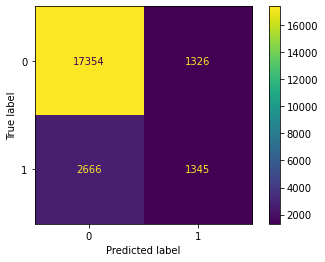

In [45]:
plot_confusion_matrix(model,X_train,y_train);

In [46]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     18680
           1       0.50      0.34      0.40      4011

    accuracy                           0.82     22691
   macro avg       0.69      0.63      0.65     22691
weighted avg       0.80      0.82      0.81     22691



In [47]:
confusion_matrix(y_test, ytest_predict)

array([[7444,  562],
       [1149,  570]])

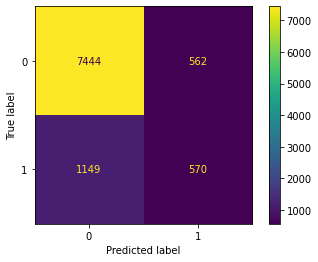

In [48]:
plot_confusion_matrix(model,X_test,y_test);

In [49]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8006
           1       0.50      0.33      0.40      1719

    accuracy                           0.82      9725
   macro avg       0.68      0.63      0.65      9725
weighted avg       0.80      0.82      0.81      9725

